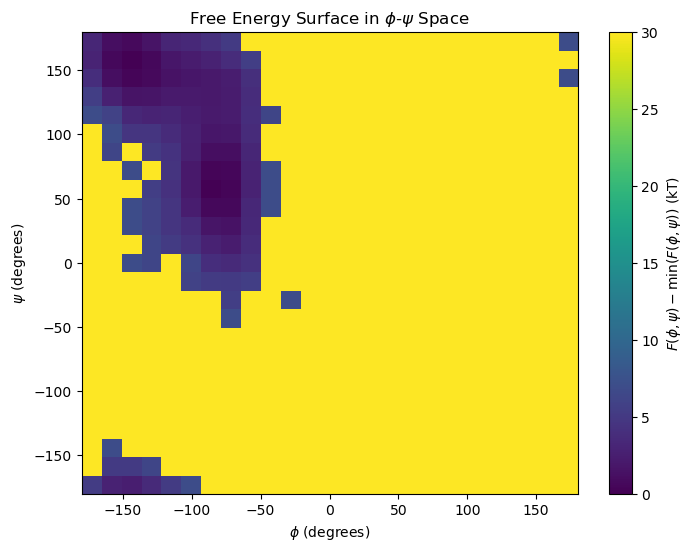

In [11]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

def compute_fes(trajectory, bins=25):
    """
    Compute the free energy surface in phi-psi space from a given trajectory.
    
    Parameters:
        trajectory: mdtraj.Trajectory object
        bins: Number of bins in each dimension (default is 25)
        
    Returns:
        F_shifted: Free energy surface on a grid
        phi_edges: Bin edges for phi
        psi_edges: Bin edges for psi
    """
    # Compute phi and psi dihedral angles
    phi_indices, phi_angles = md.compute_phi(trajectory)
    psi_indices, psi_angles = md.compute_psi(trajectory)

    # Convert to degrees
    phi_angles_deg = phi_angles * 180 / np.pi
    psi_angles_deg = psi_angles * 180 / np.pi

    # Define the bin edges and range of angles (-180 to 180 degrees)
    range_edges = [[-180, 180], [-180, 180]]

    # Compute the 2D histogram
    hist, phi_edges, psi_edges = np.histogram2d(phi_angles_deg[:, 0], psi_angles_deg[:, 0], bins=bins, range=range_edges)

    # Avoid log(0) by setting empty bins to a very small number
    hist[hist == 0] = 1e-10

    # Compute the free energy surface
    F = -np.log(hist)

    # Shift F by its minimum value
    F_min = np.min(F)
    F_shifted = F - F_min

    return F_shifted, phi_edges, psi_edges

# Load the trajectory
trajectory = md.load('adp.xtc', top='adp.gro')

# Compute the FES
F_shifted, phi_edges, psi_edges = compute_fes(trajectory)

# Plot the FES
plt.figure(figsize=(8, 6))
plt.imshow(F_shifted.T, origin='lower', extent=[-180, 180, -180, 180], cmap='viridis', aspect='auto')
plt.colorbar(label=r'$F(\phi, \psi) - \min(F(\phi, \psi))$ (kT)')
plt.xlabel(r'$\phi$ (degrees)')
plt.ylabel(r'$\psi$ (degrees)')
plt.title('Free Energy Surface in $\phi$-$\psi$ Space')
plt.show()


